In [14]:
#imports
from skimage.feature.texture import greycomatrix , greycoprops
import numpy as np 
import matplotlib.pyplot as plt 
from skimage import io

In [15]:
#load image
band = io.imread('E:/Company/KAVOSHGARAN/Virtual Irrigation/Image/Landsat/NIR.tif')

In [16]:
np.shape(band)

(998, 998)

In [26]:
#creating a matrix with the same dimension(band)
result_0 = np.empty((998 , 998) , dtype =float)
result_1 = np.empty((998 , 998) , dtype =float)
result_2 = np.empty((998 , 998) , dtype =float)
result_3 = np.empty((998 , 998) , dtype =float)
image = np.array(band , dtype = 'uint8')

In [27]:
kernel_size = 3

In [28]:
#computing GLCM matrix

for i in range(0 ,998):
    for j in range(0 , 998):
        kernel = image[ i : i + kernel_size , j : j + kernel_size]
        glcm_matrix = greycomatrix(kernel , [1] , [0] , normed = True , symmetric = True)
        
        
        con_res = greycoprops(glcm_matrix , 'contrast')[0][0]
        dissi_res = greycoprops(glcm_matrix , 'dissimilarity')[0][0]
        homo_res = greycoprops(glcm_matrix , 'homogeneity')[0][0]
        asm_res = greycoprops(glcm_matrix , 'ASM')[0][0]
        result_0[i , j] = con_res
        result_1[i , j] = dissi_res
        result_2[i , j] = homo_res
        result_3[i , j] = asm_res

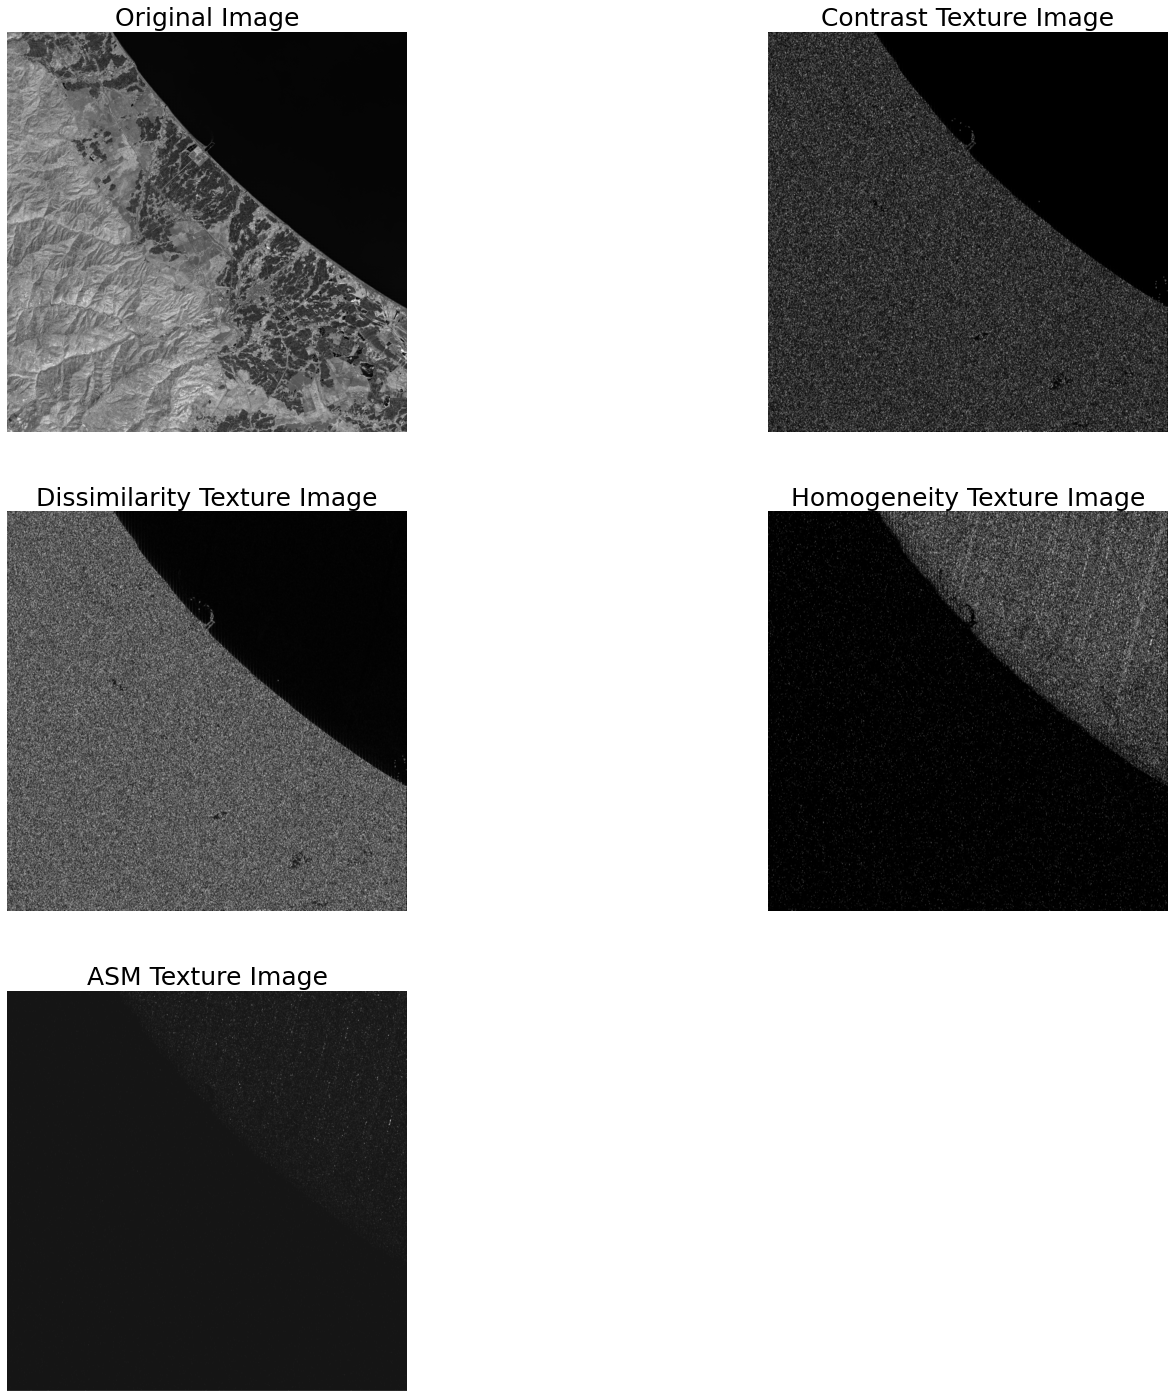

In [32]:
#demonstrate
plt.figure(figsize = (25,25))
plt.subplot(3 , 2 , 1)
plt.imshow(band , cmap = 'gray')
plt.title('Original Image' , fontsize = 25)
plt.axis('off')

###contrast
plt.subplot(3, 2 , 2)
plt.imshow(result_0 , cmap = 'gray')
plt.title('Contrast Texture Image' , fontsize = 25)
plt.axis('off')

###dissimilarity
plt.subplot(3, 2 , 3)
plt.imshow(result_1 , cmap = 'gray')
plt.title('Dissimilarity Texture Image' , fontsize = 25)
plt.axis('off')

###homogeneity
plt.subplot(3, 2 , 4)
plt.imshow(result_2 , cmap = 'gray')
plt.title('Homogeneity Texture Image' , fontsize = 25)
plt.axis('off')

###ASM
plt.subplot(3, 2 , 5)
plt.imshow(result_3 , cmap = 'gray')
plt.title('ASM Texture Image' , fontsize = 25)
plt.axis('off')
plt.savefig('C:/Users/Lenovo/Desktop/Virtual-Irrigation/Image_processing/Grey-Level Co-occurrence Matrix/images/GLCM.png')
plt.show()